In [1]:
# !pip install vaderSentiment
# !pip install joblib
# !pip install textblob

In [2]:
import pandas as pd
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
from textblob import Word
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
import joblib


import re
from contractions import contractions

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(18,9)})

# Sentiment Analysis

### Sentiment Analysis for ETH

In [ ]:
# read all files in folder

path = "../data/eth_tweets"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
df['date'] = pd.to_datetime(df["date"])
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

Compound is a normalized value [-1,1] that specify the final sentiment. This will be our main sentiment analysis indicator by tweet.

We also need to add the respective weight to the tweet sentiment. If the tweet has more likes/replies it means that that sentiment is shared. 

The main idea is that we will get the average from all the compounds considering each like/reply as a person sharing the same sentiment. 

We will create a new column called weight which will be replies + likes + 1 (all the people that share that tweet idea)

In [ ]:
df['weight'] = df['likes'] + df['replies'] + 1

In [ ]:
df

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def preprocess_tweet(text):
    # Remove url
    text = re.sub(r'http\S+', '', text)
    # Contractions transformation
    text = " ".join([contractions[word] if word in contractions else word for word in text.split(" ")])
    # Remove hashtags
    text = text.replace("#", "")
    # Remove usernames
    text = re.sub(r'@+', '', text)
    # Lemmantization and Stemming
    text = " ".join([Word(word).lemmatize("v") for word in text.split(" ")])
    
    return text

In [ ]:
number_of_tweets = 0

def aggregate_date(group):
    global number_of_tweets

    group = group.reset_index()
    number_of_tweets += len(group)
    for idx,row in group.iterrows():
        tweet = preprocess_tweet(row['text'])
        vs = analyzer.polarity_scores(tweet)

        group.at[idx, 'compound'] = vs['compound']
        group.at[idx, 'pos'] = vs['pos']
        group.at[idx, 'neu'] = vs['neu']
        group.at[idx, 'neg'] = vs['neg']
    
    print(f"date: {group.iloc[0]['date']} #tweets: {len(group)} #global_tweets: {number_of_tweets}")
    
    compound = (group['weight'] * group['compound']).sum() / group['weight'].sum()
    
    return pd.Series({"compound": compound})

sentiment_df = df.groupby('date').apply(lambda x:aggregate_date(x))
print(f"{number_of_tweets} analyzed")

In [ ]:
sentiment_df

In [ ]:
sentiment_df.to_csv("./sentiment_data/vader_eth.csv")

### Sentiment Analysis for Market

In [ ]:
# read all files in folder

path = "../data/market_tweets"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
df['date'] = pd.to_datetime(df["date"])
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [ ]:
df['weight'] = df['likes'] + df['replies'] + 1

In [ ]:
df

In [ ]:
number_of_tweets = 0

sentiment_df = df.groupby('date').apply(lambda x:aggregate_date(x))
print(f"{number_of_tweets} analyzed")

In [ ]:
sentiment_df

In [ ]:
sentiment_df.to_csv("./sentiment_data/vader_market.csv")

# Join values

In [3]:
# read all files in folder

path = "../data/eth_values"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

../data/eth_values/2016-3-24.csv read
../data/eth_values/2017-3-30.csv read
../data/eth_values/2017-3-24.csv read
../data/eth_values/2016-3-30.csv read
../data/eth_values/2016-3-18.csv read
../data/eth_values/2016-4-11.csv read
../data/eth_values/2017-3-18.csv read
../data/eth_values/2017-4-11.csv read
../data/eth_values/2017-11-10.csv read
../data/eth_values/2016-10-27.csv read
../data/eth_values/2020-7-3.csv read
../data/eth_values/2018-8-5.csv read
../data/eth_values/2021-5-4.csv read
../data/eth_values/2020-12-17.csv read
../data/eth_values/2017-5-6.csv read
../data/eth_values/2020-10-8.csv read
../data/eth_values/2016-7-1.csv read
../data/eth_values/2019-8-30.csv read
../data/eth_values/2019-1-14.csv read
../data/eth_values/2018-8-24.csv read
../data/eth_values/2018-8-30.csv read
../data/eth_values/2019-8-24.csv read
../data/eth_values/2018-1-14.csv read
../data/eth_values/2018-4-8.csv read
../data/eth_values/2020-9-14.csv read
../data/eth_values/2018-10-10.csv read
../data/eth_va

../data/eth_values/2017-4-16.csv read
../data/eth_values/2016-4-14.csv read
../data/eth_values/2017-4-14.csv read
../data/eth_values/2019-4-8.csv read
../data/eth_values/2016-4-28.csv read
../data/eth_values/2016-3-21.csv read
../data/eth_values/2017-4-28.csv read
../data/eth_values/2020-9-9.csv read
../data/eth_values/2017-3-21.csv read
../data/eth_values/2017-11-29.csv read
../data/eth_values/2017-5-3.csv read
../data/eth_values/2016-7-4.csv read
../data/eth_values/2017-11-15.csv read
../data/eth_values/2016-10-22.csv read
../data/eth_values/2020-7-6.csv read
../data/eth_values/2021-5-1.csv read
../data/eth_values/2020-12-12.csv read
../data/eth_values/2018-6-30.csv read
../data/eth_values/2018-10-15.csv read
../data/eth_values/2019-6-24.csv read
../data/eth_values/2019-11-22.csv read
../data/eth_values/2020-7-14.csv read
../data/eth_values/2019-6-30.csv read
../data/eth_values/2018-6-24.csv read
../data/eth_values/2019-1-11.csv read
../data/eth_values/2018-8-21.csv read
../data/eth_

../data/eth_values/2020-2-2.csv read
../data/eth_values/2017-12-18.csv read
../data/eth_values/2017-2-15.csv read
../data/eth_values/2016-2-15.csv read
../data/eth_values/2017-5-20.csv read
../data/eth_values/2016-2-29.csv read
../data/eth_values/2016-5-20.csv read
../data/eth_values/2017-6-1.csv read
../data/eth_values/2016-11-16.csv read
../data/eth_values/2016-4-6.csv read
../data/eth_values/2017-10-21.csv read
../data/eth_values/2019-10-9.csv read
../data/eth_values/2020-4-4.csv read
../data/eth_values/2018-10-9.csv read
../data/eth_values/2021-6-3.csv read
../data/eth_values/2019-9-5.csv read
../data/eth_values/2020-8-25.csv read
../data/eth_values/2021-1-15.csv read
../data/eth_values/2019-9-15.csv read
../data/eth_values/2020-8-31.csv read
../data/eth_values/2020-1-15.csv read
../data/eth_values/2018-9-15.csv read
../data/eth_values/2018-7-10.csv read
../data/eth_values/2021-1-29.csv read
../data/eth_values/2019-9-29.csv read
../data/eth_values/2020-8-19.csv read
../data/eth_val

../data/eth_values/2020-4-16.csv read
../data/eth_values/2019-5-26.csv read
../data/eth_values/2019-12-20.csv read
../data/eth_values/2018-2-13.csv read
../data/eth_values/2021-3-23.csv read
../data/eth_values/2018-1-6.csv read
../data/eth_values/2019-3-1.csv read
../data/eth_values/2020-3-23.csv read
../data/eth_values/2019-2-13.csv read
../data/eth_values/2021-2-8.csv read
../data/eth_values/2017-7-16.csv read
../data/eth_values/2016-7-16.csv read
../data/eth_values/2018-3-4.csv read
../data/eth_values/2016-9-13.csv read
../data/eth_values/2017-9-13.csv read
../data/eth_values/2019-1-3.csv read
../data/eth_values/2020-11-10.csv read
../data/eth_values/2017-12-17.csv read
../data/eth_values/2017-5-13.csv read
../data/eth_values/2016-5-13.csv read
../data/eth_values/2017-8-1.csv read
../data/eth_values/2017-2-26.csv read
../data/eth_values/2019-7-5.csv read
../data/eth_values/2018-5-2.csv read
../data/eth_values/2016-2-26.csv read
../data/eth_values/2016-11-19.csv read
../data/eth_valu

../data/eth_values/2016-7-28.csv read
../data/eth_values/2017-9-11.csv read
../data/eth_values/2017-7-14.csv read
../data/eth_values/2016-7-14.csv read
../data/eth_values/2017-2-8.csv read
../data/eth_values/2018-1-4.csv read
../data/eth_values/2021-3-21.csv read
../data/eth_values/2018-2-11.csv read
../data/eth_values/2018-5-18.csv read
../data/eth_values/2021-4-28.csv read
../data/eth_values/2019-2-11.csv read
../data/eth_values/2020-3-21.csv read
../data/eth_values/2020-4-28.csv read
../data/eth_values/2019-3-3.csv read
../data/eth_values/2019-5-18.csv read
../data/eth_values/2019-5-30.csv read
../data/eth_values/2021-4-14.csv read
../data/eth_values/2018-5-24.csv read
../data/eth_values/2018-5-30.csv read
../data/eth_values/2019-12-22.csv read
../data/eth_values/2019-5-24.csv read
../data/eth_values/2020-4-14.csv read
../data/eth_values/2021-3-31.csv read
../data/eth_values/2019-3-7.csv read
../data/eth_values/2020-3-25.csv read
../data/eth_values/2019-2-15.csv read
../data/eth_val

../data/eth_values/2019-6-5.csv read
../data/eth_values/2018-6-17.csv read
../data/eth_values/2018-4-2.csv read
../data/eth_values/2016-5-9.csv read
../data/eth_values/2019-11-6.csv read
../data/eth_values/2018-11-6.csv read
../data/eth_values/2019-3-27.csv read
../data/eth_values/2020-2-17.csv read
../data/eth_values/2021-2-17.csv read
../data/eth_values/2018-3-27.csv read
../data/eth_values/2018-12-23.csv read
../data/eth_values/2018-2-4.csv read
../data/eth_values/2019-4-12.csv read
../data/eth_values/2020-5-22.csv read
../data/eth_values/2021-5-22.csv read
../data/eth_values/2018-4-12.csv read
../data/eth_values/2017-1-8.csv read
../data/eth_values/2016-1-17.csv read
../data/eth_values/2017-8-27.csv read
../data/eth_values/2016-8-27.csv read
../data/eth_values/2017-1-17.csv read
../data/eth_values/2016-6-22.csv read
../data/eth_values/2017-6-22.csv read
../data/eth_values/2019-2-1.csv read
../data/eth_values/2016-12-14.csv read
../data/eth_values/2020-10-30.csv read
../data/eth_val

../data/eth_values/2019-4-14.csv read
../data/eth_values/2018-2-2.csv read
../data/eth_values/2020-5-24.csv read
../data/eth_values/2021-2-11.csv read
../data/eth_values/2018-3-21.csv read
../data/eth_values/2018-4-28.csv read
../data/eth_values/2021-5-18.csv read
../data/eth_values/2019-3-21.csv read
../data/eth_values/2020-2-11.csv read
../data/eth_values/2020-5-18.csv read
../data/eth_values/2018-12-19.csv read
../data/eth_values/2019-4-28.csv read
../data/eth_values/2016-3-9.csv read
../data/eth_values/2017-6-24.csv read
../data/eth_values/2019-2-7.csv read
../data/eth_values/2016-6-30.csv read
../data/eth_values/2016-6-24.csv read
../data/eth_values/2017-6-30.csv read
../data/eth_values/2017-6-18.csv read
../data/eth_values/2016-8-21.csv read
../data/eth_values/2017-1-11.csv read
../data/eth_values/2016-6-18.csv read
../data/eth_values/2016-1-11.csv read
../data/eth_values/2017-8-21.csv read
../data/eth_values/2020-1-9.csv read
../data/eth_values/2017-11-9.csv read
../data/eth_val

In [4]:
df['date'] = pd.to_datetime(df["date"])
df.rename(columns={"market_cap": "eth_market_cap"}, inplace=True)
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [5]:
# read all files in folder

path = "../data/market_values"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df2 = pd.read_csv(filename, index_col=0)
    df2['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df2)

df2 = pd.concat(li, axis=0, ignore_index=True)

../data/market_values/2016-3-24.csv read
../data/market_values/2017-3-30.csv read
../data/market_values/2017-3-24.csv read
../data/market_values/2016-3-30.csv read
../data/market_values/2016-3-18.csv read
../data/market_values/2016-4-11.csv read
../data/market_values/2017-3-18.csv read
../data/market_values/2017-4-11.csv read
../data/market_values/2017-11-10.csv read
../data/market_values/2016-10-27.csv read
../data/market_values/2020-7-3.csv read
../data/market_values/2018-8-5.csv read
../data/market_values/2021-5-4.csv read
../data/market_values/2020-12-17.csv read
../data/market_values/2017-5-6.csv read
../data/market_values/2020-10-8.csv read
../data/market_values/2016-7-1.csv read
../data/market_values/2019-8-30.csv read
../data/market_values/2019-1-14.csv read
../data/market_values/2018-8-24.csv read
../data/market_values/2018-8-30.csv read
../data/market_values/2019-8-24.csv read
../data/market_values/2018-1-14.csv read
../data/market_values/2018-4-8.csv read
../data/market_valu

../data/market_values/2020-1-7.csv read
../data/market_values/2020-10-10.csv read
../data/market_values/2016-6-16.csv read
../data/market_values/2017-6-16.csv read
../data/market_values/2017-8-13.csv read
../data/market_values/2016-1-23.csv read
../data/market_values/2017-1-23.csv read
../data/market_values/2019-2-9.csv read
../data/market_values/2016-8-13.csv read
../data/market_values/2016-3-7.csv read
../data/market_values/2021-1-2.csv read
../data/market_values/2020-3-5.csv read
../data/market_values/2020-5-16.csv read
../data/market_values/2019-4-26.csv read
../data/market_values/2018-12-17.csv read
../data/market_values/2018-4-26.csv read
../data/market_values/2021-5-16.csv read
../data/market_values/2020-2-23.csv read
../data/market_values/2019-3-13.csv read
../data/market_values/2018-3-13.csv read
../data/market_values/2021-2-23.csv read
../data/market_values/2017-7-6.csv read
../data/market_values/2020-12-8.csv read
../data/market_values/2016-5-1.csv read
../data/market_values

../data/market_values/2016-8-28.csv read
../data/market_values/2017-6-11.csv read
../data/market_values/2016-1-24.csv read
../data/market_values/2017-8-14.csv read
../data/market_values/2017-1-30.csv read
../data/market_values/2016-8-14.csv read
../data/market_values/2017-1-24.csv read
../data/market_values/2016-1-30.csv read
../data/market_values/2016-1-2.csv read
../data/market_values/2017-3-5.csv read
../data/market_values/2021-3-7.csv read
../data/market_values/2016-12-27.csv read
../data/market_values/2020-10-17.csv read
../data/market_values/2020-1-1.csv read
../data/market_values/2020-10-16.csv read
../data/market_values/2016-12-26.csv read
../data/market_values/2021-3-6.csv read
../data/market_values/2017-3-4.csv read
../data/market_values/2017-11-1.csv read
../data/market_values/2016-1-3.csv read
../data/market_values/2016-11-1.csv read
../data/market_values/2017-1-25.csv read
../data/market_values/2016-8-15.csv read
../data/market_values/2016-1-31.csv read
../data/market_valu

../data/market_values/2017-10-18.csv read
../data/market_values/2021-6-6.csv read
../data/market_values/2017-10-30.csv read
../data/market_values/2017-6-4.csv read
../data/market_values/2016-11-13.csv read
../data/market_values/2017-10-24.csv read
../data/market_values/2016-4-3.csv read
../data/market_values/2018-11-30.csv read
../data/market_values/2018-7-15.csv read
../data/market_values/2020-6-25.csv read
../data/market_values/2019-7-15.csv read
../data/market_values/2019-10-13.csv read
../data/market_values/2018-11-24.csv read
../data/market_values/2020-8-20.csv read
../data/market_values/2021-1-10.csv read
../data/market_values/2019-9-10.csv read
../data/market_values/2018-7-29.csv read
../data/market_values/2020-1-10.csv read
../data/market_values/2018-9-10.csv read
../data/market_values/2019-7-29.csv read
../data/market_values/2018-11-18.csv read
../data/market_values/2020-6-19.csv read
../data/market_values/2018-9-5.csv read
../data/market_values/2020-6-3.csv read
../data/marke

../data/market_values/2019-12-12.csv read
../data/market_values/2020-4-24.csv read
../data/market_values/2020-4-30.csv read
../data/market_values/2018-1-8.csv read
../data/market_values/2021-4-24.csv read
../data/market_values/2018-5-14.csv read
../data/market_values/2019-2-21.csv read
../data/market_values/2020-3-11.csv read
../data/market_values/2020-4-18.csv read
../data/market_values/2019-5-28.csv read
../data/market_values/2021-3-11.csv read
../data/market_values/2018-2-21.csv read
../data/market_values/2018-5-28.csv read
../data/market_values/2021-4-18.csv read
../data/market_values/2020-3-13.csv read
../data/market_values/2019-2-23.csv read
../data/market_values/2018-2-23.csv read
../data/market_values/2021-3-13.csv read
../data/market_values/2020-4-26.csv read
../data/market_values/2019-12-10.csv read
../data/market_values/2019-5-16.csv read
../data/market_values/2018-5-16.csv read
../data/market_values/2021-4-26.csv read
../data/market_values/2017-2-6.csv read
../data/market_v

../data/market_values/2018-2-10.csv read
../data/market_values/2021-3-20.csv read
../data/market_values/2018-1-5.csv read
../data/market_values/2021-4-29.csv read
../data/market_values/2018-5-19.csv read
../data/market_values/2017-2-9.csv read
../data/market_values/2016-7-15.csv read
../data/market_values/2017-7-15.csv read
../data/market_values/2016-7-29.csv read
../data/market_values/2017-9-10.csv read
../data/market_values/2017-7-29.csv read
../data/market_values/2018-3-7.csv read
../data/market_values/2016-9-10.csv read
../data/market_values/2017-12-28.csv read
../data/market_values/2017-12-14.csv read
../data/market_values/2020-11-13.csv read
../data/market_values/2016-2-19.csv read
../data/market_values/2017-8-2.csv read
../data/market_values/2016-5-10.csv read
../data/market_values/2017-2-19.csv read
../data/market_values/2017-5-10.csv read
../data/market_values/2016-2-25.csv read
../data/market_values/2018-5-1.csv read
../data/market_values/2017-2-25.csv read
../data/market_val

../data/market_values/2017-7-11.csv read
../data/market_values/2017-9-28.csv read
../data/market_values/2016-7-11.csv read
../data/market_values/2016-9-14.csv read
../data/market_values/2018-3-3.csv read
../data/market_values/2017-9-14.csv read
../data/market_values/2019-1-4.csv read
../data/market_values/2016-10-8.csv read
../data/market_values/2017-10-8.csv read
../data/market_values/2021-4-11.csv read
../data/market_values/2018-5-21.csv read
../data/market_values/2018-2-28.csv read
../data/market_values/2021-3-18.csv read
../data/market_values/2019-5-21.csv read
../data/market_values/2019-12-27.csv read
../data/market_values/2020-4-11.csv read
../data/market_values/2020-3-18.csv read
../data/market_values/2019-2-28.csv read
../data/market_values/2020-3-30.csv read
../data/market_values/2018-1-1.csv read
../data/market_values/2021-3-24.csv read
../data/market_values/2018-2-14.csv read
../data/market_values/2019-3-6.csv read
../data/market_values/2021-3-30.csv read
../data/market_valu

../data/market_values/2020-7-25.csv read
../data/market_values/2019-6-15.csv read
../data/market_values/2019-11-13.csv read
../data/market_values/2018-10-24.csv read
../data/market_values/2018-10-30.csv read
../data/market_values/2020-7-31.csv read
../data/market_values/2018-6-15.csv read
../data/market_values/2018-8-10.csv read
../data/market_values/2019-1-20.csv read
../data/market_values/2019-6-29.csv read
../data/market_values/2018-10-18.csv read
../data/market_values/2020-7-19.csv read
../data/market_values/2020-9-20.csv read
../data/market_values/2018-1-20.csv read
../data/market_values/2019-8-10.csv read
../data/market_values/2017-9-3.csv read
../data/market_values/2018-6-29.csv read
../data/market_values/2017-11-18.csv read
../data/market_values/2016-10-13.csv read
../data/market_values/2017-11-24.csv read
../data/market_values/2016-7-9.csv read
../data/market_values/2017-11-30.csv read
../data/market_values/2020-12-23.csv read
../data/market_values/2016-4-25.csv read
../data/m

In [6]:
df2['date'] = pd.to_datetime(df2["date"])
df2.set_index('date', drop=True, inplace=True)
df2.sort_index(inplace=True)

In [7]:
values = df.merge(df2, left_index=True, right_index=True)

# Join with df's

In [8]:
eth_sentiment = pd.read_csv(
    "./sentiment_data/vader_eth.csv", 
    parse_dates = ['date'], 
    index_col=0,
)

eth_sentiment.rename(
    columns={"compound": "eth_compound" }, 
    inplace=True
)
eth_sentiment

eth_compound
date                    
2016-01-01      0.026956
2016-01-02      0.115659
2016-01-03      0.038601
2016-01-04      0.111993
2016-01-05      0.213066
...                  ...
2021-04-26      0.299050
2021-04-27      0.277402
2021-04-28      0.295821
2021-04-29      0.303374
2021-04-30      0.227169

[1947 rows x 1 columns]

In [9]:
market_sentiment = pd.read_csv(
    "./sentiment_data/vader_market.csv", 
    parse_dates=['date'], 
    index_col=0,
)

market_sentiment.rename(
    columns={"compound": "market_compound" }, 
    inplace=True
)
market_sentiment

market_compound
date                       
2016-01-01         0.211387
2016-01-02         0.176242
2016-01-03         0.095403
2016-01-04         0.117600
2016-01-05         0.276788
...                     ...
2021-04-26         0.279148
2021-04-27         0.350111
2021-04-28         0.415627
2021-04-29         0.272866
2021-04-30         0.445635

[1947 rows x 1 columns]

In [10]:
sentiment = eth_sentiment.merge(market_sentiment, left_index=True, right_index=True)

In [11]:
sentiment

eth_compound  market_compound
date                                     
2016-01-01      0.026956         0.211387
2016-01-02      0.115659         0.176242
2016-01-03      0.038601         0.095403
2016-01-04      0.111993         0.117600
2016-01-05      0.213066         0.276788
...                  ...              ...
2021-04-26      0.299050         0.279148
2021-04-27      0.277402         0.350111
2021-04-28      0.295821         0.415627
2021-04-29      0.303374         0.272866
2021-04-30      0.227169         0.445635

[1947 rows x 2 columns]

In [12]:
df = values.merge(sentiment, left_index=True, right_index=True)

In [13]:
df

open         high          low        close        volume  \
date                                                                           
2016-01-01     0.933712     0.954822     0.931442     0.948024  2.060620e+05   
2016-01-02     0.947401     0.969637     0.936560     0.937124  2.555040e+05   
2016-01-03     0.938430     0.991362     0.934313     0.971905  4.076320e+05   
2016-01-04     0.972045     0.976438     0.929835     0.954480  3.462450e+05   
2016-01-05     0.953147     0.970597     0.946543     0.950176  2.198330e+05   
...                 ...          ...          ...          ...           ...   
2021-04-26  2319.478089  2536.337402  2308.315165  2534.481799  3.520833e+10   
2021-04-27  2534.031309  2676.392864  2485.375025  2662.865246  3.227597e+10   
2021-04-28  2664.685565  2757.477348  2564.081459  2746.380053  3.426903e+10   
2021-04-29  2748.649711  2797.972385  2672.106668  2756.876994  3.257813e+10   
2021-04-30  2757.734115  2796.054816  2728.170023  2773.207132  2.977718e+10   

            eth_market_cap    market_cap     24_volume  \
date                                                     
2016-01-01    7.198039e+07  7.152640e+09  3.706480e+07   
2016-01-02    7.117666e+07  7.139970e+09  3.073750e+07   
2016-01-03    7.384329e+07  7.088010e+09  3.916350e+07   
2016-01-04    7.254371e+07  7.133420e+09  4.115170e+07   
2016-01-05    7.224097e+07  7.114720e+09  3.419890e+07   
...                    ...           ...           ...   
2021-04-26    2.930691e+11  2.019390e+12  1.608654e+11   
2021-04-27    3.079504e+11  2.085564e+12  1.450982e+11   
2021-04-28    3.176457e+11  2.094349e+12  1.517277e+11   
2021-04-29    3.188970e+11  2.076747e+12  1.367930e+11   
2021-04-30    3.208229e+11  2.202190e+12  1.447795e+11   

            market_cap_without_btc  24_volume_without_btc  eth_compound  \
date                                                                      
2016-01-01            6.190110e+08           4.071150e+06      0.026956   
2016-01-02            6.204780e+08           3.901870e+06      0.115659   
2016-01-03            6.198330e+08           2.728000e+06      0.038601   
2016-01-04            6.180350e+08           5.937510e+06      0.111993   
2016-01-05            6.158910e+08           2.989220e+06      0.213066   
...                            ...                    ...           ...   
2021-04-26            1.009678e+12           1.026082e+11      0.299050   
2021-04-27            1.057463e+12           9.562782e+10      0.277402   
2021-04-28            1.069652e+12           1.037263e+11      0.295821   
2021-04-29            1.075376e+12           9.071063e+10      0.303374   
2021-04-30            1.122404e+12           9.238534e+10      0.227169   

            market_compound  
date                         
2016-01-01         0.211387  
2016-01-02         0.176242  
2016-01-03         0.095403  
2016-01-04         0.117600  
2016-01-05         0.276788  
...                     ...  
2021-04-26         0.279148  
2021-04-27         0.350111  
2021-04-28         0.415627  
2021-04-29         0.272866  
2021-04-30         0.445635  

[1947 rows x 12 columns]

# Create new features

In [14]:
# # Let's use the percentage change on all of this features instead of the current values
sentiment_cols = ['eth_compound', 'market_compound']
df[[f"{x}_log_ret" for x in df.columns.difference(sentiment_cols)]] = np.log(1 + df[df.columns.difference(sentiment_cols)].pct_change())

In [15]:
df = df.iloc[1:]

In [16]:
df['close_trend'] = Binarizer().fit_transform(df[['close_log_ret']])

/var/folders/v7/v9lcvdrj3d50yc7wmr260x2m0000gn/T/ipykernel_45535/1927529421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_trend'] = Binarizer().fit_transform(df[['close_log_ret']])


In [17]:
# Remove price columns
price_cols = ['open', 'close', 'high', 'low', '24_volume', '24_volume_without_btc', 'eth_market_cap', 'volume', 'market_cap_without_btc', 'market_cap']
df = df[df.columns.difference(price_cols)]

In [18]:
df.to_csv("./vader_consolidated_data.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1946 entries, 2016-01-02 to 2021-04-30
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   24_volume_log_ret               1946 non-null   float64
 1   24_volume_without_btc_log_ret   1946 non-null   float64
 2   close_log_ret                   1946 non-null   float64
 3   close_trend                     1946 non-null   float64
 4   eth_compound                    1946 non-null   float64
 5   eth_market_cap_log_ret          1946 non-null   float64
 6   high_log_ret                    1946 non-null   float64
 7   low_log_ret                     1946 non-null   float64
 8   market_cap_log_ret              1946 non-null   float64
 9   market_cap_without_btc_log_ret  1946 non-null   float64
 10  market_compound                 1946 non-null   float64
 11  open_log_ret                    1946 non-null   float64
 12  volume_log_ret  

# Train and Test

In [19]:
split = int(len(df) * 0.8)

df_train = df[:split]
df_test = df[split:]

In [20]:
train_target = pd.DataFrame(df[['close_trend']][:split].reset_index(drop=True).values)
test_target = pd.DataFrame(df[['close_trend']][split:].reset_index(drop=True).values)

In [21]:
train_features = pd.DataFrame(df[:split].reset_index(drop=True).values)
test_features = pd.DataFrame(df[split:].reset_index(drop=True).values)

In [22]:
# target and test features don't need preproccesing

train_target.to_csv("./vader_train/trend/train_target.csv")
test_target.to_csv("./vader_train/trend/test_target.csv")
test_features.to_csv("./vader_train/trend/test_features.csv")

# PCA and preprocess for train features

In [23]:
# Lets normalize the values and store the normalizer
scaler = StandardScaler()
scaler.fit(train_features)
joblib.dump(scaler, './vader_train/trend/scaler.pkl')
features = pd.DataFrame(scaler.transform(train_features))
features

0         1         2         3         4         5         6   \
0    -0.691283 -0.163161 -0.240500 -0.997433 -1.199458 -0.238961  0.222333   
1     0.852884 -1.219276  0.540114  1.002574 -1.860047  0.541702  0.345916   
2     0.159839  2.583090 -0.346636 -0.997433 -1.230882 -0.345098 -0.336352   
3    -0.683687 -2.318828 -0.125949 -0.997433 -0.364422 -0.124373 -0.168764   
4     0.071687  0.718402 -0.040759  1.002574 -0.727406 -0.039236 -0.247214   
...        ...       ...       ...       ...       ...       ...       ...   
1551  0.625020  0.512500  0.194083  1.002574  1.887215  0.192202  0.125162   
1552  0.564396  0.541261  0.696633  1.002574  1.311411  0.694735  1.385246   
1553 -0.656731 -0.585165 -0.045345  1.002574  0.773283 -0.047249 -0.045057   
1554 -0.527528 -0.471578  0.301625  1.002574  1.220130  0.299713 -0.249535   
1555 -0.359639 -0.299579 -0.240848 -0.997433  0.621239 -0.242758  0.035112   

            7         8         9         10        11        12  
0     0.036336 -0.094599 -0.013146 -0.754194  0.185619  0.537848  
1    -0.091032 -0.229366 -0.083420 -1.477617 -0.209366  1.189489  
2    -0.129853  0.104202 -0.121886 -1.278980  0.524330 -0.440079  
3     0.235583 -0.115358 -0.133644  0.145586 -0.375425 -1.192528  
4    -0.238264 -0.141431 -0.061568 -1.214567 -0.107021  0.860315  
...        ...       ...       ...       ...       ...       ...  
1551 -0.289868  0.605143  0.277818  1.510537  0.044261  0.288060  
1552  0.678560  0.484430  0.369405  1.866639  0.205094  0.517263  
1553  0.404087 -0.143503  0.069297  1.264744  0.700371 -0.406673  
1554  0.005836  0.403300  0.254109  1.403608 -0.041141 -0.273023  
1555  0.174566 -0.348358 -0.287191  1.678057  0.294530 -0.166342  

[1556 rows x 13 columns]

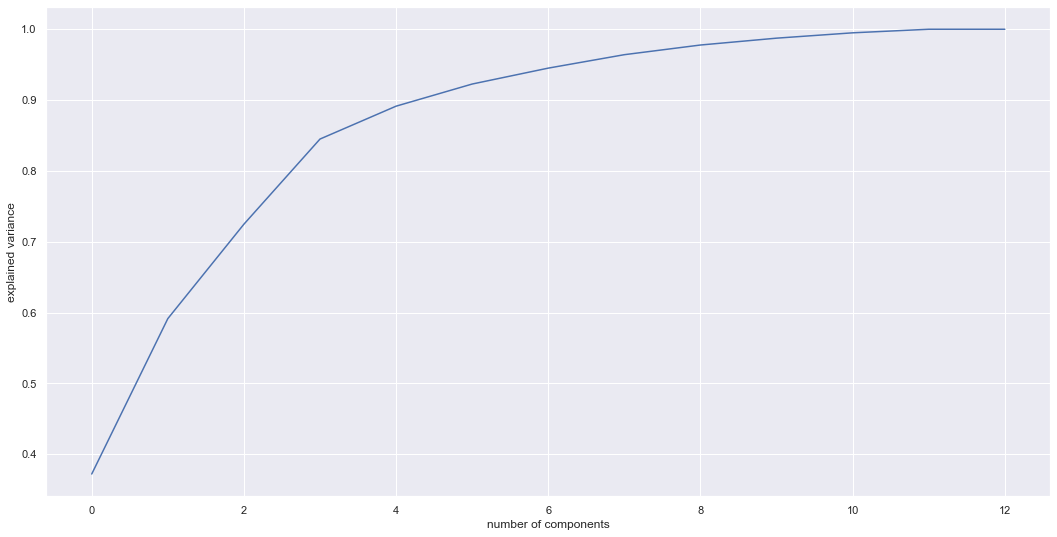

In [24]:
pca = PCA().fit(features)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [25]:
pca = PCA(n_components=8).fit(features)
joblib.dump(pca, './vader_train/trend/pca.pkl')
components = pca.transform(features)
features = pd.DataFrame(components)

In [26]:
features

0         1         2         3         4         5         6  \
0     0.419108  0.033524  1.501186  0.205375 -0.363395  0.785806 -0.244216   
1    -0.890354  0.647036  1.866204  1.362165  1.178075  0.115209 -0.332978   
2     0.505657  1.484740  1.648807  0.442318 -1.332313 -0.355324  0.074451   
3     0.835444 -2.311211  0.420334  0.080698 -0.366016  0.859027 -0.288860   
4    -0.235694  1.007848  0.894175  1.018427  0.769914 -0.612802  0.281210   
...        ...       ...       ...       ...       ...       ...       ...   
1551 -0.771093  0.541161 -2.435958 -0.768310  0.224972 -0.764784  0.207786   
1552 -1.936053  0.624363 -1.903480 -1.520130  0.535574 -0.101323 -0.434816   
1553 -0.252020 -1.150115 -0.951291 -1.113348  0.736110 -0.689933 -0.393745   
1554 -0.587969 -1.014668 -1.820583 -0.430048  0.520439 -0.437736 -0.162940   
1555  0.810336 -0.522967 -1.018778 -1.355112 -0.402405  0.658201 -0.689773   

             7  
0     0.645839  
1     0.162868  
2    -0.517573  
3     0.012094  
4     0.141343  
...        ...  
1551  0.179479  
1552 -0.044154  
1553  0.132638  
1554  0.261782  
1555  0.038929  

[1556 rows x 8 columns]

In [27]:
features.to_csv("./vader_train/trend/train_features.csv")